#### Ranjeet Kumar

# Loan Application Status Prediction

### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

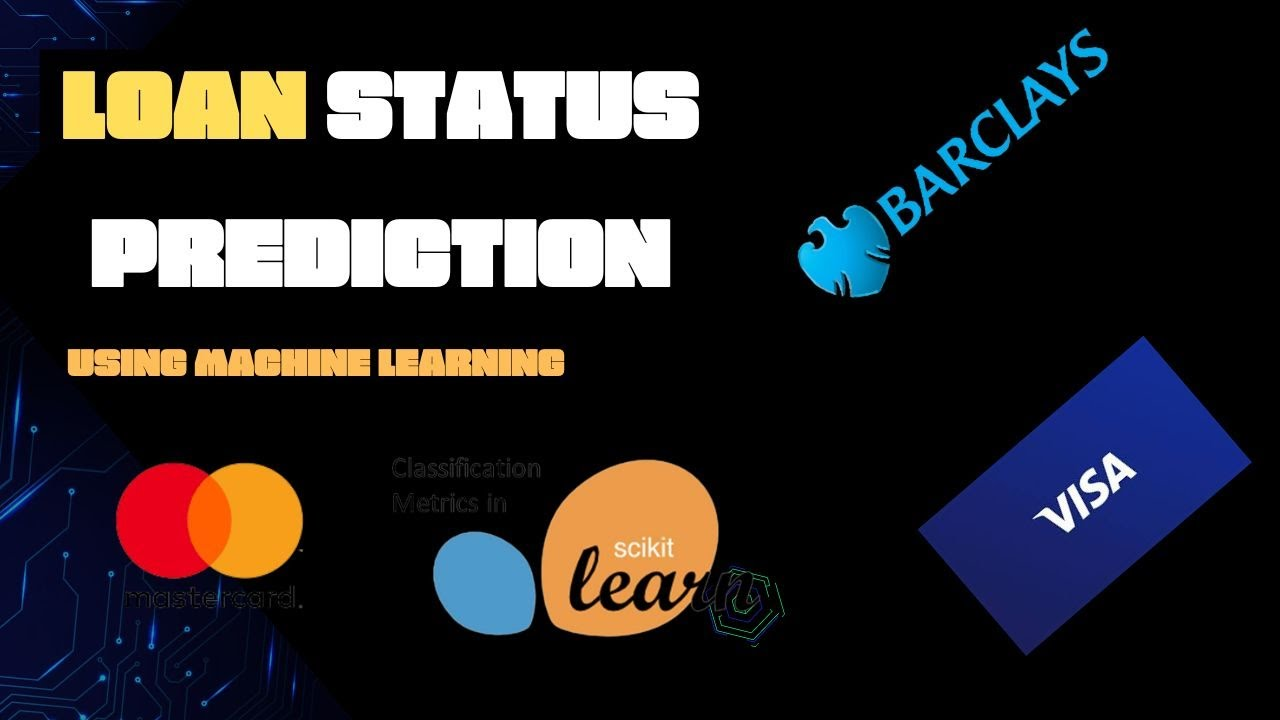

In [1]:
# Importing required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/91770/Downloads/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

We have 614 rows and 13 columns in data

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 object and 5 numerical columns in data

In [9]:
df['Loan_Amount_Term'].nunique()

10

In [10]:
df['Dependents'].nunique()

4

In [11]:
df['LoanAmount'].nunique()

203

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [14]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Filling LoanAmount with mean values

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [19]:
df.shape

(614, 12)

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can see there is big difference between 75% and max , means there must be outliers in data

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

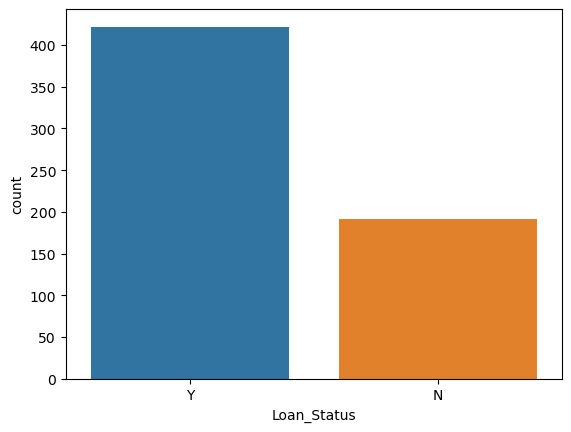

In [21]:
sns.countplot(df['Loan_Status'])

we can see tah,Data is imbalance

# EDA

In [22]:
import matplotlib.pyplot as plt

In [23]:
dfcorr=df.corr()

<AxesSubplot:>

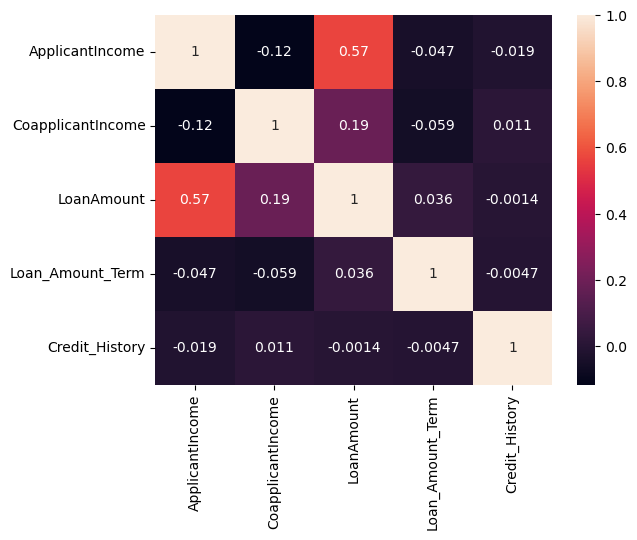

In [24]:
sns.heatmap(dfcorr,annot=True)

We can not notice LoanAmount is correlated with ApplicantIncome

all the other featurs are negatively correlated with each other

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


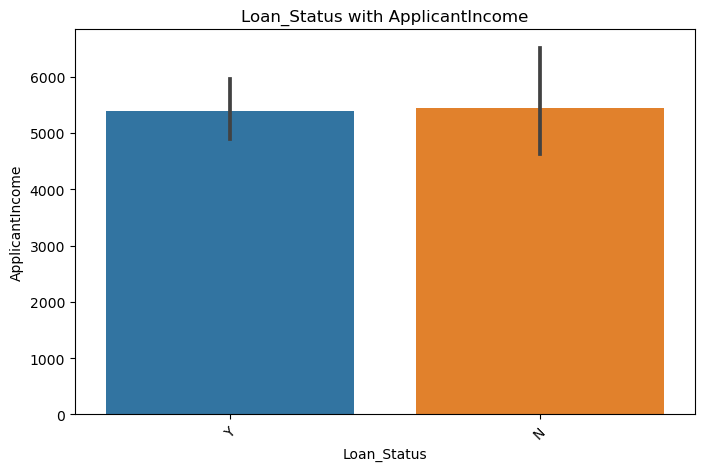

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Chances are equal it doesn't matter with ApplicantIncome

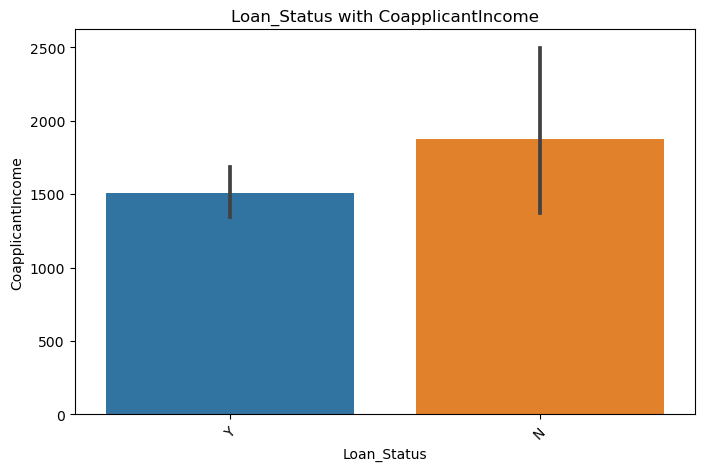

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Here we notice some interesting figure there are chances not to be approved donts matter if CoapplicantIncome is high might be thats depends on all other figutres

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

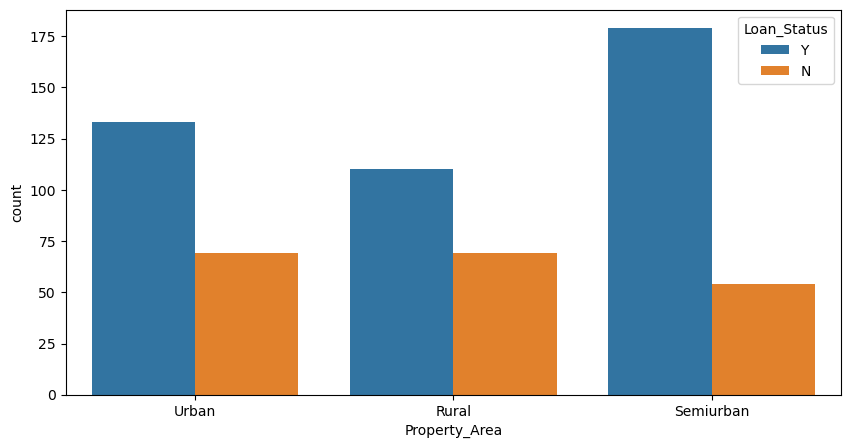

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People those are from Urban area having 50-50 chances of approval depends and other parameters as well

In RuralProperty_area not approval chances are increasing

In Semiurban area there are high chances to get approval

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

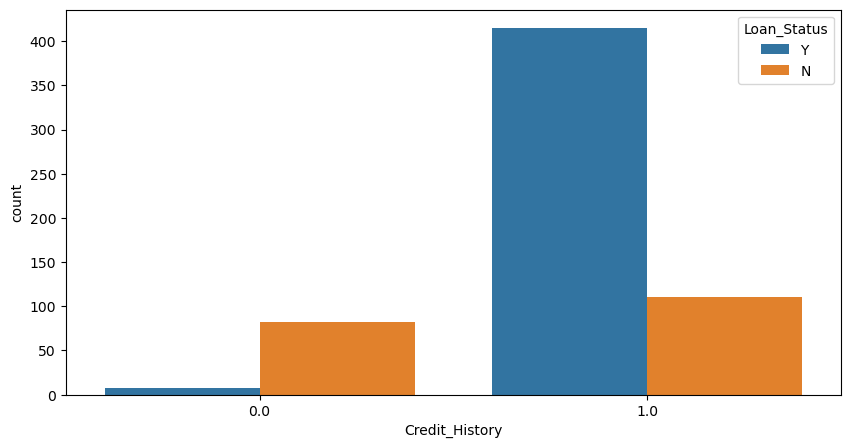

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved

People those are taking loan for 480 months, most of them are not getting approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

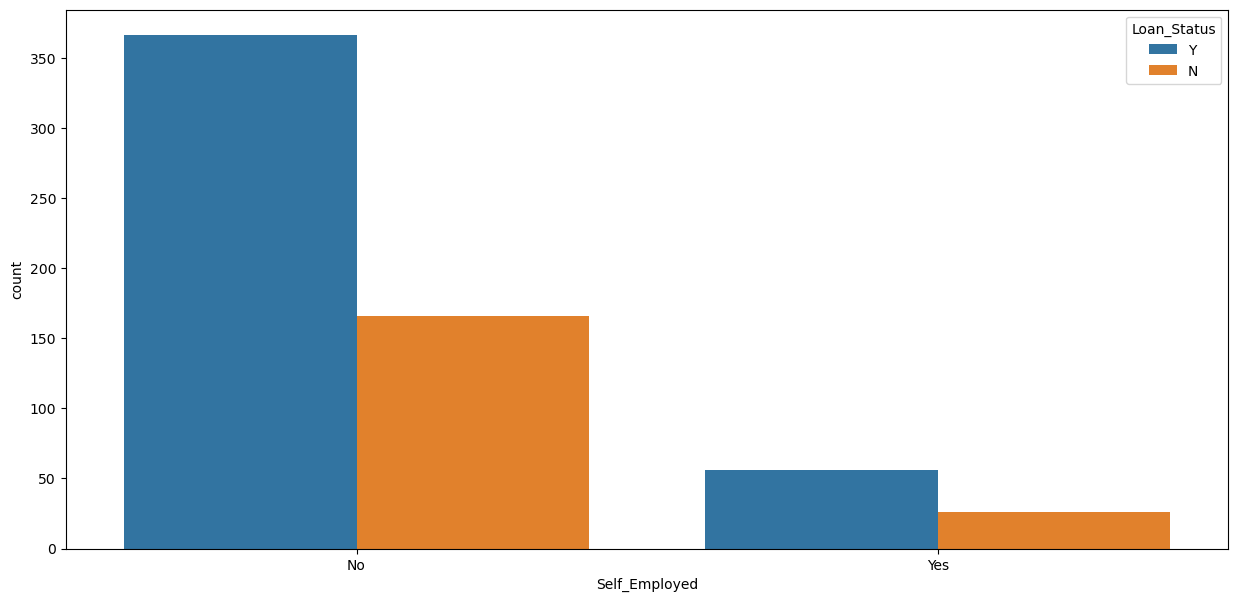

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In self_employed we see there around 50% of diffrence between approved and not approved people

<AxesSubplot:xlabel='Education', ylabel='count'>

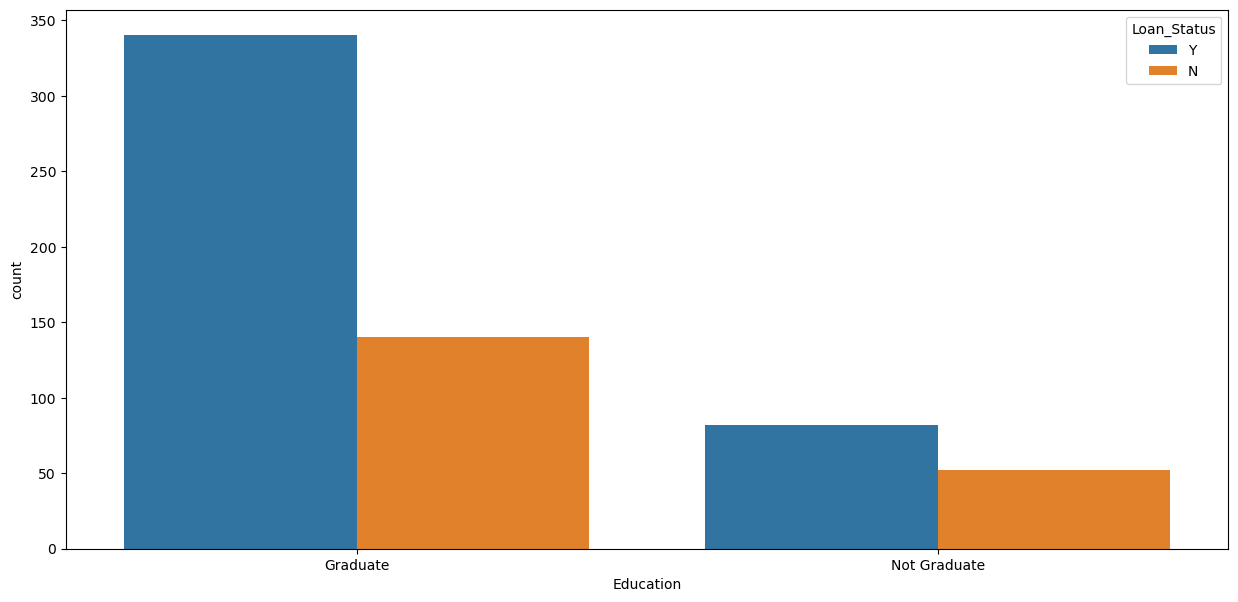

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

In Graduate categ. we have around 350 approved loan and around 150 not approved

<AxesSubplot:xlabel='Dependents', ylabel='count'>

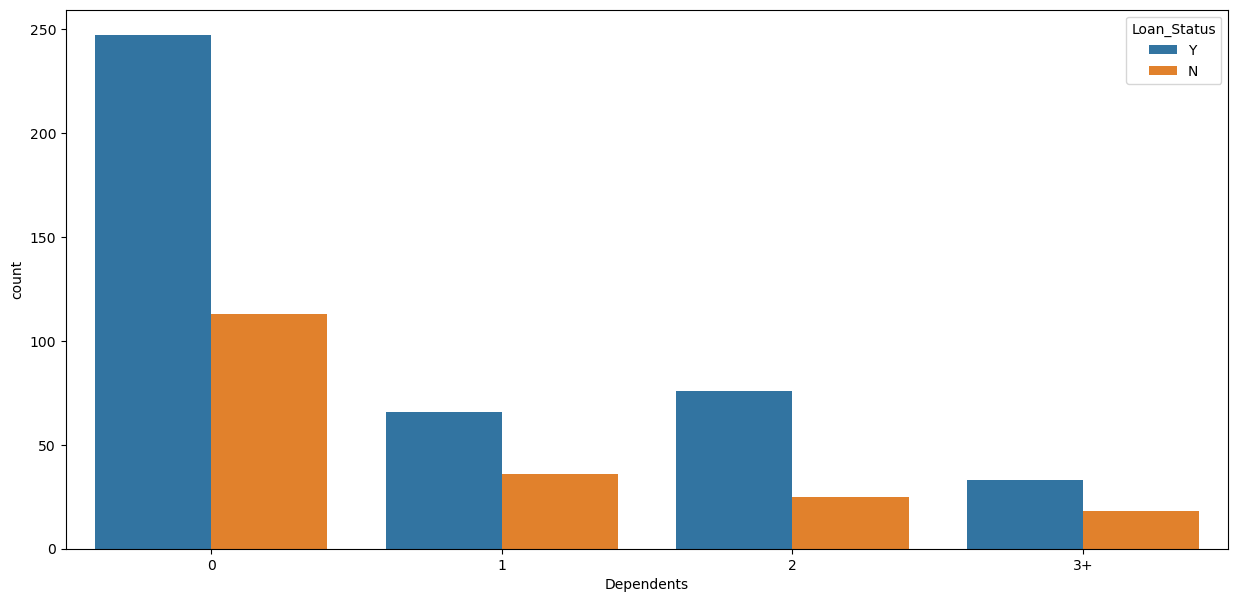

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

when dependents numbers are 3+ there is less chances of approval

#### Using LabelEncoder for convering categorical to numerical

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


All columns are converted into numerical now

# Skewness handling

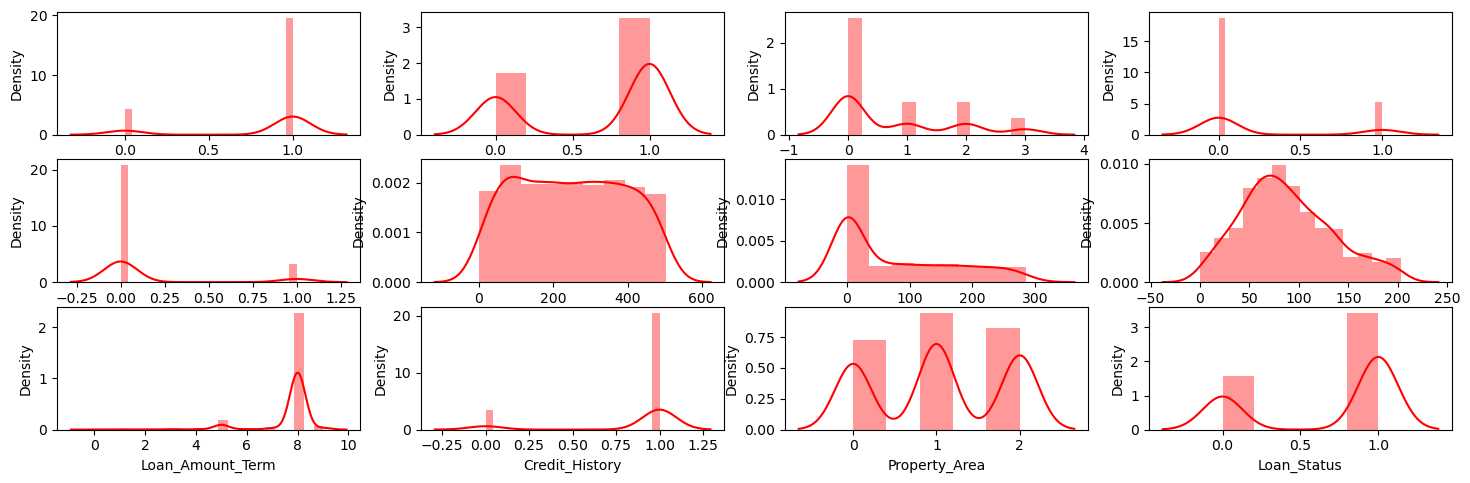

In [39]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [40]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness more than+/- 0.5 will we treated

object and Target column will no be treated

we can see here most of the columns are skewed,CoapplicantIncome

In [41]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Checking Outliers

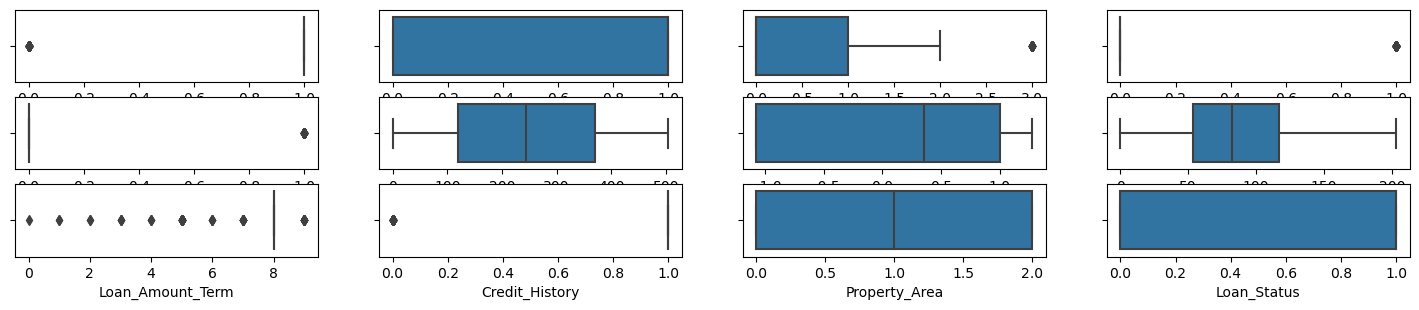

In [42]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed

# outliers removal

### zscore

In [43]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [44]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


Zscore removing 12 rows from data

# IQR

In [45]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

3.0

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


choosing ZSCORE because there is huge dataloss in IQR

# Dividing data into X and Y

In [48]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [49]:
x.shape

(614, 11)

In [50]:
y.shape

(614,)

# scaling X values

In [51]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [52]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [53]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.432118,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.224976,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.575123,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

# Imbalanced learn
#### Using OverSamling_BorderlineSMOTE

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

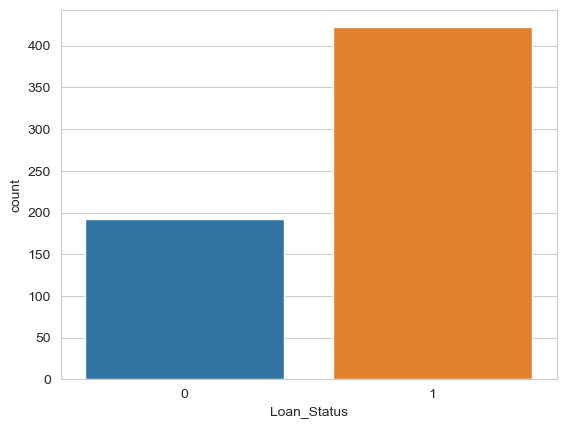

In [54]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no

In [56]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

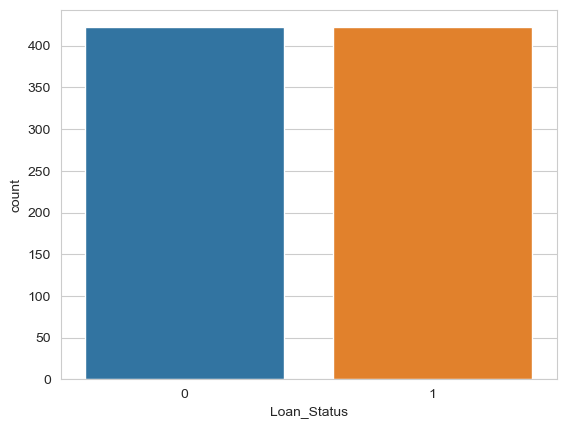

In [57]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balaced data for model training

# Spliting Train and Test data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [61]:
x_train.shape

(616, 11)

In [62]:
x_test.shape

(228, 11)

In [63]:
y_train.shape

(616,)

In [64]:
y_test.shape

(228,)

# MODEL BUILDING:

In [66]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [67]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6161137440758294


In [68]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6447368421052632
[[63 60]
 [21 84]]
              precision    recall  f1-score   support

           0       0.75      0.51      0.61       123
           1       0.58      0.80      0.67       105

    accuracy                           0.64       228
   macro avg       0.67      0.66      0.64       228
weighted avg       0.67      0.64      0.64       228

Training accuracy:: 0.6347402597402597
Test accuracy:: 0.6447368421052632


# DECISION TREE CLASSIFIER

In [69]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.725119752042829


In [70]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.6973684210526315
[[89 34]
 [35 70]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       123
           1       0.67      0.67      0.67       105

    accuracy                           0.70       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.70      0.70      0.70       228

Training accuracy:: 1.0
Test accuracy:: 0.6973684210526315


# Kneighbors Classifier

In [71]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.726260918568611


In [72]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6973684210526315
[[91 32]
 [37 68]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       123
           1       0.68      0.65      0.66       105

    accuracy                           0.70       228
   macro avg       0.70      0.69      0.69       228
weighted avg       0.70      0.70      0.70       228

Training accuracy:: 0.8392857142857143
Test accuracy:: 0.6973684210526315


# RandomForestClassifier

In [73]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.810460693153001


In [74]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7719298245614035
[[93 30]
 [22 83]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       123
           1       0.73      0.79      0.76       105

    accuracy                           0.77       228
   macro avg       0.77      0.77      0.77       228
weighted avg       0.77      0.77      0.77       228

Training accuracy:: 1.0
Test accuracy:: 0.7719298245614035


# ENSEMBLE TECHNIQUES

### 1.ADA BOOST CLASSIFIER

In [76]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7383473389355741


In [77]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.706140350877193
[[76 47]
 [20 85]]
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       123
           1       0.64      0.81      0.72       105

    accuracy                           0.71       228
   macro avg       0.72      0.71      0.71       228
weighted avg       0.72      0.71      0.70       228

Training accuracy:: 0.8051948051948052
Test accuracy:: 0.706140350877193


## 2.BAGGING CLASSIFIER

In [79]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.794047619047619


In [80]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7631578947368421
[[91 32]
 [22 83]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       123
           1       0.72      0.79      0.75       105

    accuracy                           0.76       228
   macro avg       0.76      0.77      0.76       228
weighted avg       0.77      0.76      0.76       228

Training accuracy:: 0.9902597402597403
Test accuracy:: 0.7631578947368421


## 3.Gradient Boosting classifier

In [81]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7585854341736694


In [82]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7412280701754386
[[79 44]
 [15 90]]
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       123
           1       0.67      0.86      0.75       105

    accuracy                           0.74       228
   macro avg       0.76      0.75      0.74       228
weighted avg       0.76      0.74      0.74       228

Training accuracy:: 0.900974025974026
Test accuracy:: 0.7412280701754386


GradientBoostingClassifier as final model for HYPER PARAMETER TUNING

## HYPER PARAMETER TUNING:

In [83]:
grbc=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200,50],
    'learning_rate':[0.1,0.5],
     'loss':['deviance', 'exponential']              
}

In [84]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error']
}


grbc = GradientBoostingClassifier()


grbc_grid = GridSearchCV(grbc, param_grid, cv=4, n_jobs=-1)
grbc_grid.fit(x_train, y_train)


grbc_pred = grbc_grid.best_estimator_.predict(x_test)

# Print the accuracy
print("Accuracy after parameter tuning:", accuracy_score(y_test, grbc_pred))

Accuracy after parameter tuning: 0.7587719298245614


In [88]:
grbc_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

### model training with best parameters

In [89]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['deviance']
}

In [90]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [92]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'squared_error']
}


grbc = GradientBoostingClassifier()


best_grbc_grid = GridSearchCV(grbc, param_grid, cv=4, n_jobs=-1)
best_grbc_grid.fit(x_train, y_train)


best_grbc_pred = best_grbc_grid.best_estimator_.predict(x_test)

# Print the accuracy
print("Accuracy after parameter tuning:", accuracy_score(y_test, best_grbc_pred))

Accuracy after parameter tuning: 0.7631578947368421


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

# Report of GradientBoostingClassifier

In [94]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       123
           1       0.71      0.82      0.76       105

    accuracy                           0.76       228
   macro avg       0.77      0.77      0.76       228
weighted avg       0.77      0.76      0.76       228



<AxesSubplot:>

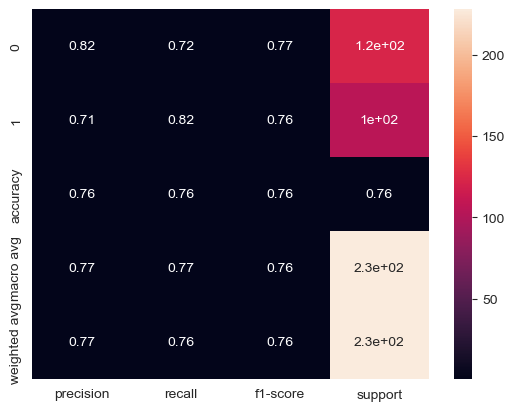

In [95]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

roc auc score:: 0.7672473867595818


In [98]:
from sklearn.metrics import roc_curve

In [99]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

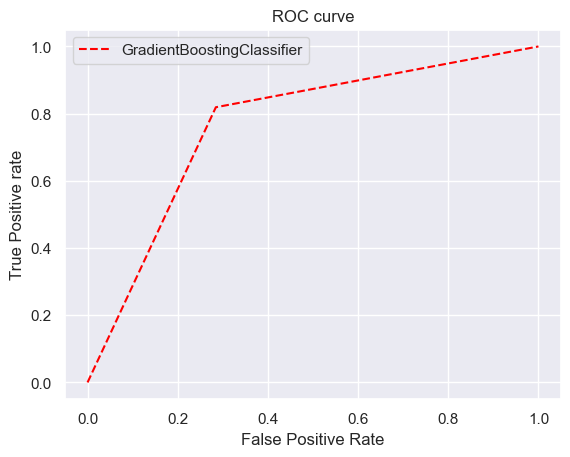

In [100]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [101]:
import joblib

In [102]:
joblib.dump(best_grbc_grid.best_estimator_,'Loan Application Status_Prediction.obj')

['Loan Application Status_Prediction.obj']